## LEAD SCORE CASE STUDY

### Problem Statement:

An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.Now, although X Education gets a lot of leads, its lead conversion rate is very poor.

To make this process more efficient, the company wishes to identify the most potential leads. As the CEO has given a ballpark of the target lead conversion rate to be around 80%,The company requires us  The company wants us:

 **To build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score      have a higher conversion chance and the customers with lower lead score have a lower conversion chance.**

###  Objective:

 **We have predictor variables, with the help of these we have select the most promising leads, i.e. the leads that are most      likely to convert into paying customers.**


### Step 1: Reading and Understanding the Data

In [332]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [247]:
# Import and read the Data
Leads=pd.read_csv("Leads.csv")
#Leads=pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [248]:
# Let's check the dimensions of the dataframe
Leads.shape

(9240, 37)

In [249]:
# let's look at the statistical aspects of the dataframe
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


7 numerical variables

In [250]:
# Let's see the type of each column
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Step 2: Data Cleaning and Redifining

#### Remove redundancy
As we saw from datasource and metadata, there are a few columns with redundant information we will identify and drop such columns

##### 'Last Activity' and 'Last Notable Activity'

In [251]:
Leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [252]:
Leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [253]:
# As this is a redundant data, drop 'Last Activity'
Leads=Leads.drop('Last Activity', axis =1)

##### 'How did you hear about X Education'

In [254]:
Leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Now, this infrmation is covered by other columns in the  data, such as Through Recmmendations, Online Search etc.

In [255]:
# So we drop "How did you hear about X Education" 
Leads=Leads.drop('How did you hear about X Education', axis=1)

##### Country and City

In [256]:
Leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Kuwait                     4
Sweden                     3
Philippines                2
Bangladesh                 2
Netherlands                2
Italy                      2
Uganda                     2
Asia/Pacific Region        2
Ghana                      2
Belgium                    2
China                      2
Indonesia                  1
Kenya                      1
Denmark                    1
Russia                     1
Sri Lanka                  1
Switzerland                1
Malaysia      

In [257]:
Leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We have multiple countries data, but city data only for Mumbai, rest of the cities are not identified

In [258]:
# We will drop city column
Leads=Leads.drop('City', axis=1)

##### Assymetric Activity Index and Assymetric Activity Score

In [259]:
Leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [260]:
Leads['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [261]:
# Since both columns give similar information, we will keep "Asymmetrique Activity Index" as it has a clear ranking values
Leads=Leads.drop('Asymmetrique Activity Score', axis=1)

In [262]:
# Similarly, we remove 'Assymetrique Profile Score' and keep the Index values
Leads=Leads.drop('Asymmetrique Profile Score', axis=1)

In [263]:
# Check Remaining columns
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Country                                          6779 non-null object
Specialization                                   7802 non-null object
What is your current occupation                  6550 

#### Rename columns for a clear understanding

Rename some of the columns for better understanding

In [264]:
Leads=Leads.rename(columns={
    'What matters most to you in choosing a course':    'Course_choose_reason',
    'What is your current occupation':           'Current_occupation',
    'Total Time Spent on Website':       'Total_time_spent',
    'A free copy of Mastering The Interview':   'Mastering_interview_copy',
    'Receive More Updates About Our Courses':    'Receive_more_updates',
    'Update me on Supply Chain Content':        'Update_supply_chain',
    'I agree to pay the amount through cheque':  'Cheque',
    'Get updates on DM Content':   'Update_dm_content'
})

#### CheckMissing Values

In [265]:
# check percantage missing values of each column
round(Leads.isnull().sum()*100/len(Leads.index),2).sort_values(ascending=False)

Lead Quality                   51.59
Asymmetrique Profile Index     45.65
Asymmetrique Activity Index    45.65
Tags                           36.29
Lead Profile                   29.32
Course_choose_reason           29.32
Current_occupation             29.11
Country                        26.63
Specialization                 15.56
TotalVisits                     1.48
Page Views Per Visit            1.48
Lead Source                     0.39
Lead Origin                     0.00
Lead Number                     0.00
Do Not Email                    0.00
Do Not Call                     0.00
Converted                       0.00
Total_time_spent                0.00
Last Notable Activity           0.00
Magazine                        0.00
Search                          0.00
Mastering_interview_copy        0.00
Newspaper Article               0.00
X Education Forums              0.00
Newspaper                       0.00
Digital Advertisement           0.00
Through Recommendations         0.00
R

In [266]:
#Drop Lead quality as it has mre than 50% missing data
Leads=Leads.drop('Lead Quality',axis=1)

#Drop Assymetric Profile Index and Assyemtric Activity Index" as the rest of the variables will help in activity and profile information
#Also it has 45% missing values
Leads=Leads.drop('Asymmetrique Profile Index',axis=1)
Leads=Leads.drop('Asymmetrique Activity Index',axis=1)
#Drop tags column as it has many distinct values and more than 30% missing
Leads=Leads.drop('Tags',axis=1)

#check the dataframe after changes
round(Leads.isnull().sum()*100/len(Leads.index),2).sort_values(ascending=False)

Course_choose_reason        29.32
Lead Profile                29.32
Current_occupation          29.11
Country                     26.63
Specialization              15.56
TotalVisits                  1.48
Page Views Per Visit         1.48
Lead Source                  0.39
Lead Number                  0.00
Lead Origin                  0.00
Do Not Email                 0.00
Do Not Call                  0.00
Converted                    0.00
Total_time_spent             0.00
Last Notable Activity        0.00
Mastering_interview_copy     0.00
Search                       0.00
Magazine                     0.00
Newspaper Article            0.00
X Education Forums           0.00
Newspaper                    0.00
Digital Advertisement        0.00
Through Recommendations      0.00
Receive_more_updates         0.00
Update_supply_chain          0.00
Update_dm_content            0.00
Cheque                       0.00
Prospect ID                  0.00
dtype: float64

In [267]:
# check the values in course_choose_reason
Leads['Course_choose_reason'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: Course_choose_reason, dtype: int64

As only 3 values are different, there is no variance in this column, hence removing

In [268]:
Leads=Leads.drop('Course_choose_reason',axis=1)

In [269]:
#Check Leads profile
Leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [270]:
#Since most of the data is "Select(meaning no value) and null, hence drop the column"
Leads=Leads.drop('Lead Profile',axis=1)

In [271]:
#Check Current Occupation
Leads['Current_occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Current_occupation, dtype: int64

In [272]:
#Since this seems important, let us impute the missing values to others, since we cannot say they are unemployed.
Leads['Current_occupation'] = Leads['Current_occupation'].fillna("Other")

#Check the values 
Leads['Current_occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: Current_occupation, dtype: int64

In [273]:
#Check "Country"
Leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Kuwait                     4
Sweden                     3
Philippines                2
Bangladesh                 2
Netherlands                2
Italy                      2
Uganda                     2
Asia/Pacific Region        2
Ghana                      2
Belgium                    2
China                      2
Indonesia                  1
Kenya                      1
Denmark                    1
Russia                     1
Sri Lanka                  1
Switzerland                1
Malaysia      

In [274]:
#Since this seems important, let us impute the missing values to unknown, as it is among the values.
Leads['Country'] = Leads['Country'].fillna("unknown")

#Check the values 
Leads['Country'].value_counts()

India                   6492
unknown                 2466
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
Nigeria                    4
South Africa               4
Canada                     4
Germany                    4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Philippines                2
Bangladesh                 2
Netherlands                2
Italy                      2
Uganda                     2
Ghana                      2
China                      2
Belgium                    2
Vietnam                    1
Kenya                      1
Denmark                    1
Indonesia                  1
Russia                     1
Sri Lanka                  1
Malaysia      

In [275]:
#Check Specialization
Leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [276]:
#Since this seems important, let us impute the missing values to Select, as it is among the values.
Leads['Specialization'] = Leads['Specialization'].fillna("Select")

#Check the values 
Leads['Specialization'].value_counts()

Select                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [277]:
#Let's remove the null values in "Total visits" and "Page views per visit" and "Lead Source"
Leads.dropna(subset=['TotalVisits', 'Page Views Per Visit', 'Lead Source'], inplace=True)

In [278]:
#check the dataframe after changes
round(Leads.isnull().sum()*100/len(Leads.index),2).sort_values(ascending=False)

Last Notable Activity       0.0
Mastering_interview_copy    0.0
Lead Number                 0.0
Lead Origin                 0.0
Lead Source                 0.0
Do Not Email                0.0
Do Not Call                 0.0
Converted                   0.0
TotalVisits                 0.0
Total_time_spent            0.0
Page Views Per Visit        0.0
Country                     0.0
Specialization              0.0
Current_occupation          0.0
Search                      0.0
Magazine                    0.0
Newspaper Article           0.0
X Education Forums          0.0
Newspaper                   0.0
Digital Advertisement       0.0
Through Recommendations     0.0
Receive_more_updates        0.0
Update_supply_chain         0.0
Update_dm_content           0.0
Cheque                      0.0
Prospect ID                 0.0
dtype: float64

### Step 3: Data Preparation

#### Yes/No Values to 1/0

In [279]:
#check dataframe
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
Prospect ID                 9074 non-null object
Lead Number                 9074 non-null int64
Lead Origin                 9074 non-null object
Lead Source                 9074 non-null object
Do Not Email                9074 non-null object
Do Not Call                 9074 non-null object
Converted                   9074 non-null int64
TotalVisits                 9074 non-null float64
Total_time_spent            9074 non-null int64
Page Views Per Visit        9074 non-null float64
Country                     9074 non-null object
Specialization              9074 non-null object
Current_occupation          9074 non-null object
Search                      9074 non-null object
Magazine                    9074 non-null object
Newspaper Article           9074 non-null object
X Education Forums          9074 non-null object
Newspaper                   9074 non-null object
Digital Adve

In [280]:
# Converting Yes to 1 and No to 0

#Convert "Do not email" to "Email" and reverse assign the values
Leads['Email'] = Leads['Do Not Email'].map({'Yes': 0, 'No': 1})

#Convert "Do not Call" to "Call" and reverse assign the values
Leads['Call'] = Leads['Do Not Call'].map({'Yes': 0, 'No': 1})

Leads=Leads.drop('Do Not Email',axis=1)
Leads=Leads.drop('Do Not Call',axis=1)

In [281]:
#check other yes/no columns and concert to 1/0

bool_cols = [ col for col in Leads
            if np.isin(Leads[col].unique(),["Yes","No"]).all()]
bool_cols

C:\Users\vi024ch\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive_more_updates',
 'Update_supply_chain',
 'Update_dm_content',
 'Cheque',
 'Mastering_interview_copy']

In [282]:
#Create a map to convert numeric categorical values into digits format
# Defining the map function
def num_map(x):
    return x.map({'Yes': 1,'No': 0})

# Applying the function to the Leads
Leads[bool_cols] = Leads[bool_cols].apply(num_map)

#Check
Leads[bool_cols].head()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive_more_updates,Update_supply_chain,Update_dm_content,Cheque,Mastering_interview_copy
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [283]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
Prospect ID                 9074 non-null object
Lead Number                 9074 non-null int64
Lead Origin                 9074 non-null object
Lead Source                 9074 non-null object
Converted                   9074 non-null int64
TotalVisits                 9074 non-null float64
Total_time_spent            9074 non-null int64
Page Views Per Visit        9074 non-null float64
Country                     9074 non-null object
Specialization              9074 non-null object
Current_occupation          9074 non-null object
Search                      9074 non-null int64
Magazine                    9074 non-null int64
Newspaper Article           9074 non-null int64
X Education Forums          9074 non-null int64
Newspaper                   9074 non-null int64
Digital Advertisement       9074 non-null int64
Through Recommendations     9074 non-null int64
Receive_more_update

In [284]:
bool_cols

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive_more_updates',
 'Update_supply_chain',
 'Update_dm_content',
 'Cheque',
 'Mastering_interview_copy']

check the counts of boolean values in ach columns

In [285]:
# Search
Leads.Search.value_counts()

0    9060
1      14
Name: Search, dtype: int64

In [286]:
# approximately all the values are same hence drop the column as it does nt have much variance
Leads=Leads.drop('Search' , axis=1)

In [287]:
# Magazine
Leads.Magazine.value_counts()

0    9074
Name: Magazine, dtype: int64

In [288]:
# dropping the column because all the values are same
Leads=Leads.drop('Magazine' , axis=1)

In [289]:
# Newspaper Article
Leads['Newspaper Article'].value_counts()

0    9072
1       2
Name: Newspaper Article, dtype: int64

In [290]:
# approximately all the values are same hence drop  the column
Leads=Leads.drop('Newspaper Article' , axis=1)

In [291]:
# X Education Forums
Leads['X Education Forums'].value_counts()

0    9073
1       1
Name: X Education Forums, dtype: int64

In [292]:
# approximately all the values are same hence drop  the column
Leads=Leads.drop('X Education Forums' , axis=1)

In [293]:
#Newspaper
Leads['Newspaper'].value_counts()

0    9073
1       1
Name: Newspaper, dtype: int64

In [294]:
# approximately all the values are same hence drop  the column
Leads=Leads.drop('Newspaper' , axis=1)

In [295]:
# Digital Advertisement
Leads['Digital Advertisement'].value_counts()

0    9070
1       4
Name: Digital Advertisement, dtype: int64

In [296]:
# approximately all the values are same hence drop  the column
Leads=Leads.drop('Digital Advertisement' , axis=1)

In [297]:
# Through Recommendations
Leads['Through Recommendations'].value_counts()

0    9067
1       7
Name: Through Recommendations, dtype: int64

In [298]:
# approximately all the values are same hence drop  the column
Leads=Leads.drop('Through Recommendations' , axis=1)

In [299]:
# Receive_more_updates
Leads['Receive_more_updates'].value_counts()

0    9074
Name: Receive_more_updates, dtype: int64

In [300]:
# All the values are same hence drop  the column
Leads=Leads.drop('Receive_more_updates' , axis=1)

In [301]:
# Update_supply_chain
Leads['Update_supply_chain'].value_counts()

0    9074
Name: Update_supply_chain, dtype: int64

In [302]:
# All the values are same hence drop  the column
Leads=Leads.drop('Update_supply_chain' , axis=1)

In [303]:
# Update_dm_content
Leads['Update_dm_content'].value_counts()

0    9074
Name: Update_dm_content, dtype: int64

In [304]:
# All the values are same hence drop  the column
Leads=Leads.drop('Update_dm_content' , axis=1)

In [305]:
# Cheque
Leads['Cheque'].value_counts()

0    9074
Name: Cheque, dtype: int64

In [306]:
# All the values are same hence drop  the column
Leads=Leads.drop('Cheque' , axis=1)

In [307]:
# Mastering_interview_copy
Leads['Mastering_interview_copy'].value_counts()

0    6186
1    2888
Name: Mastering_interview_copy, dtype: int64

In [308]:
# Call
Leads['Call'].value_counts()

1    9072
0       2
Name: Call, dtype: int64

In [309]:
# Almost all the values are same hence drop  the column
Leads=Leads.drop('Call' , axis=1)

In [310]:
# Email
Leads['Email'].value_counts()

1    8358
0     716
Name: Email, dtype: int64

In [311]:
#check data
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
Prospect ID                 9074 non-null object
Lead Number                 9074 non-null int64
Lead Origin                 9074 non-null object
Lead Source                 9074 non-null object
Converted                   9074 non-null int64
TotalVisits                 9074 non-null float64
Total_time_spent            9074 non-null int64
Page Views Per Visit        9074 non-null float64
Country                     9074 non-null object
Specialization              9074 non-null object
Current_occupation          9074 non-null object
Mastering_interview_copy    9074 non-null int64
Last Notable Activity       9074 non-null object
Email                       9074 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.0+ MB


#### Dummy Variable Creation

In [312]:
#Check values first

# Lead Origin
Leads['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [313]:
#Let's merge the outliers into "Others"
Leads['Lead Origin']=Leads['Lead Origin'].replace(to_replace=['Lead Add Form','Lead Import'], value='Others')
Leads['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Others                      611
Name: Lead Origin, dtype: int64

In [314]:
# Lead Source
Leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
WeLearn                 1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [315]:
#Let's merge the outliers into "Others"
Leads['Lead Source']=Leads['Lead Source'].replace(to_replace=['WeLearn','blog','NC_EDM','testone','welearnblog_Home','Pay per Click Ads','youtubechannel','Live Chat','Social Media','Facebook','bing','Click2call','Press_Release'], value='Others')
Leads['Lead Source']=Leads['Lead Source'].replace(to_replace=['google'], value='Google')
Leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64

In [316]:
# Country
Leads['Country'].value_counts()

India                   6491
unknown                 2301
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
Nigeria                    4
South Africa               4
Canada                     4
Germany                    4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Philippines                2
Bangladesh                 2
Netherlands                2
Italy                      2
Uganda                     2
Ghana                      2
China                      2
Belgium                    2
Vietnam                    1
Kenya                      1
Denmark                    1
Indonesia                  1
Russia                     1
Sri Lanka                  1
Malaysia      

In [317]:
#Let's merge the outliers into "Others"
Leads['Country']=Leads['Country'].replace(to_replace=['Singapore',
'Saudi Arabia',              
'United Kingdom',           
'Australia',
'Qatar',                     
'Bahrain',                    
'Hong Kong',
'Oman',
'France',
'South Africa',               
'Canada', 
'Kuwait',                     
'Germany',                    
'Nigeria',                    
'Sweden',                     
'Italy',                      
'Uganda',                     
'Netherlands',                
'Bangladesh',                 
'China',                      
'Ghana',                      
'Asia/Pacific Region',        
'Belgium',                    
'Philippines',                
'Denmark',                    
'Russia',                     
'Kenya',                      
'Malaysia',                   
'Sri Lanka',                  
'Liberia',                  
'Vietnam',                   
'Switzerland',              
'Tanzania',                   
'Indonesia'], value='Others')
Leads['Country'].value_counts()

India                   6491
unknown                 2301
Others                   160
United States             69
United Arab Emirates      53
Name: Country, dtype: int64

In [318]:
# Lead Origin
Leads['Specialization'].value_counts()

Select                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [319]:
#Let's merge the outliers into "Others"
Leads['Specialization']=Leads['Specialization'].replace(to_replace=['Rural and Agribusiness','E-Business','Services Excellence'], value='Others')
Leads['Specialization'].value_counts()

Select                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Others                                170
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Name: Specialization, dtype: int64

In [320]:
# Lead Origin
Leads['Current_occupation'].value_counts()

Unemployed              5476
Other                   2698
Working Professional     677
Student                  206
Housewife                  9
Businessman                8
Name: Current_occupation, dtype: int64

In [321]:
#Let's merge the outliers into "Others"
Leads['Current_occupation']=Leads['Current_occupation'].replace(to_replace=['Housewife','Businessman'], value='Other')
Leads['Current_occupation'].value_counts()

Unemployed              5476
Other                   2715
Working Professional     677
Student                  206
Name: Current_occupation, dtype: int64

In [322]:
# Lead Origin
Leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [323]:
#Let's merge the outliers into "Others"
Leads['Last Notable Activity']=Leads['Last Notable Activity'].replace(to_replace=['Email Marked Spam','Email Received','Approached upfront','View in browser link Clicked','Resubscribed to emails','Form Submitted on Website','Had a Phone Conversation','Unreachable','Unsubscribed','Email Bounced'], value='Others')
Leads['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      158
Name: Last Notable Activity, dtype: int64

In [324]:
#List categorical features
catfeatures = ['Lead Origin','Lead Source','Country','Specialization','Current_occupation','Last Notable Activity']
# Create dummies and drop the first column
Leads_cat = pd.get_dummies(Leads[catfeatures], drop_first = True)

#Adding the results to the master dataframe
Leads = pd.concat([Leads,Leads_cat],axis=1)

#Drop category columns
Leads=Leads.drop(catfeatures , axis=1)

#Check dataset
Leads.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total_time_spent,Page Views Per Visit,Mastering_interview_copy,Email,Lead Origin_Landing Page Submission,Lead Origin_Others,...,Specialization_Travel and Tourism,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0


In [325]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 46 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total_time_spent                                 9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Mastering_interview_copy                         9074 non-null int64
Email                                            9074 non-null int64
Lead Origin_Landing Page Submission              9074 non-null uint8
Lead Origin_Others                               9074 non-null uint8
Lead Source_Google                               9074 non-null uint8
Lead Source_Olark Chat                           9074 non-null uint8
Lead Source_Organic Search                       9074 non-nu

In [326]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total_time_spent,Page Views Per Visit,Mastering_interview_copy,Email,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,...,Specialization_Travel and Tourism,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151,0.318272,0.921093,0.538351,0.067335,0.316619,...,0.022261,0.022702,0.603482,0.074609,0.311109,0.360040,0.020168,0.017412,0.035045,0.237161
std,23348.029512,0.485053,4.858802,545.256560,2.160871,0.465831,0.269608,0.498554,0.250616,0.465183,...,0.147541,0.148961,0.489201,0.262774,0.462973,0.480038,0.140581,0.130809,0.183904,0.425365
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Feature Standardisation

In [329]:
# Normalising continuous features
df = Leads[['TotalVisits','Page Views Per Visit','Total_time_spent']]

In [330]:
normalized_df=(df-df.mean())/df.std()
Leads = Leads.drop(['TotalVisits','Page Views Per Visit','Total_time_spent'], 1)
Leads = pd.concat([Leads,normalized_df],axis=1)
Leads.head()

,Prospect ID,Lead Number,Converted,Mastering_interview_copy,Email,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Current_occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,TotalVisits,Page Views Per Visit,Total_time_spent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,-0.711292,-1.096850,-0.885615
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0.317768,0.060091,0.350500
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,-0.299668,-0.171297,1.924071
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,-0.505480,-0.634074,-0.326245
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,-0.299668,-0.634074,1.733335


#### Checking the Conversion Rate

In [331]:
convert = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
convert

37.85541106458012

We have almost 38% conversion rate

#### Correlation Matrix

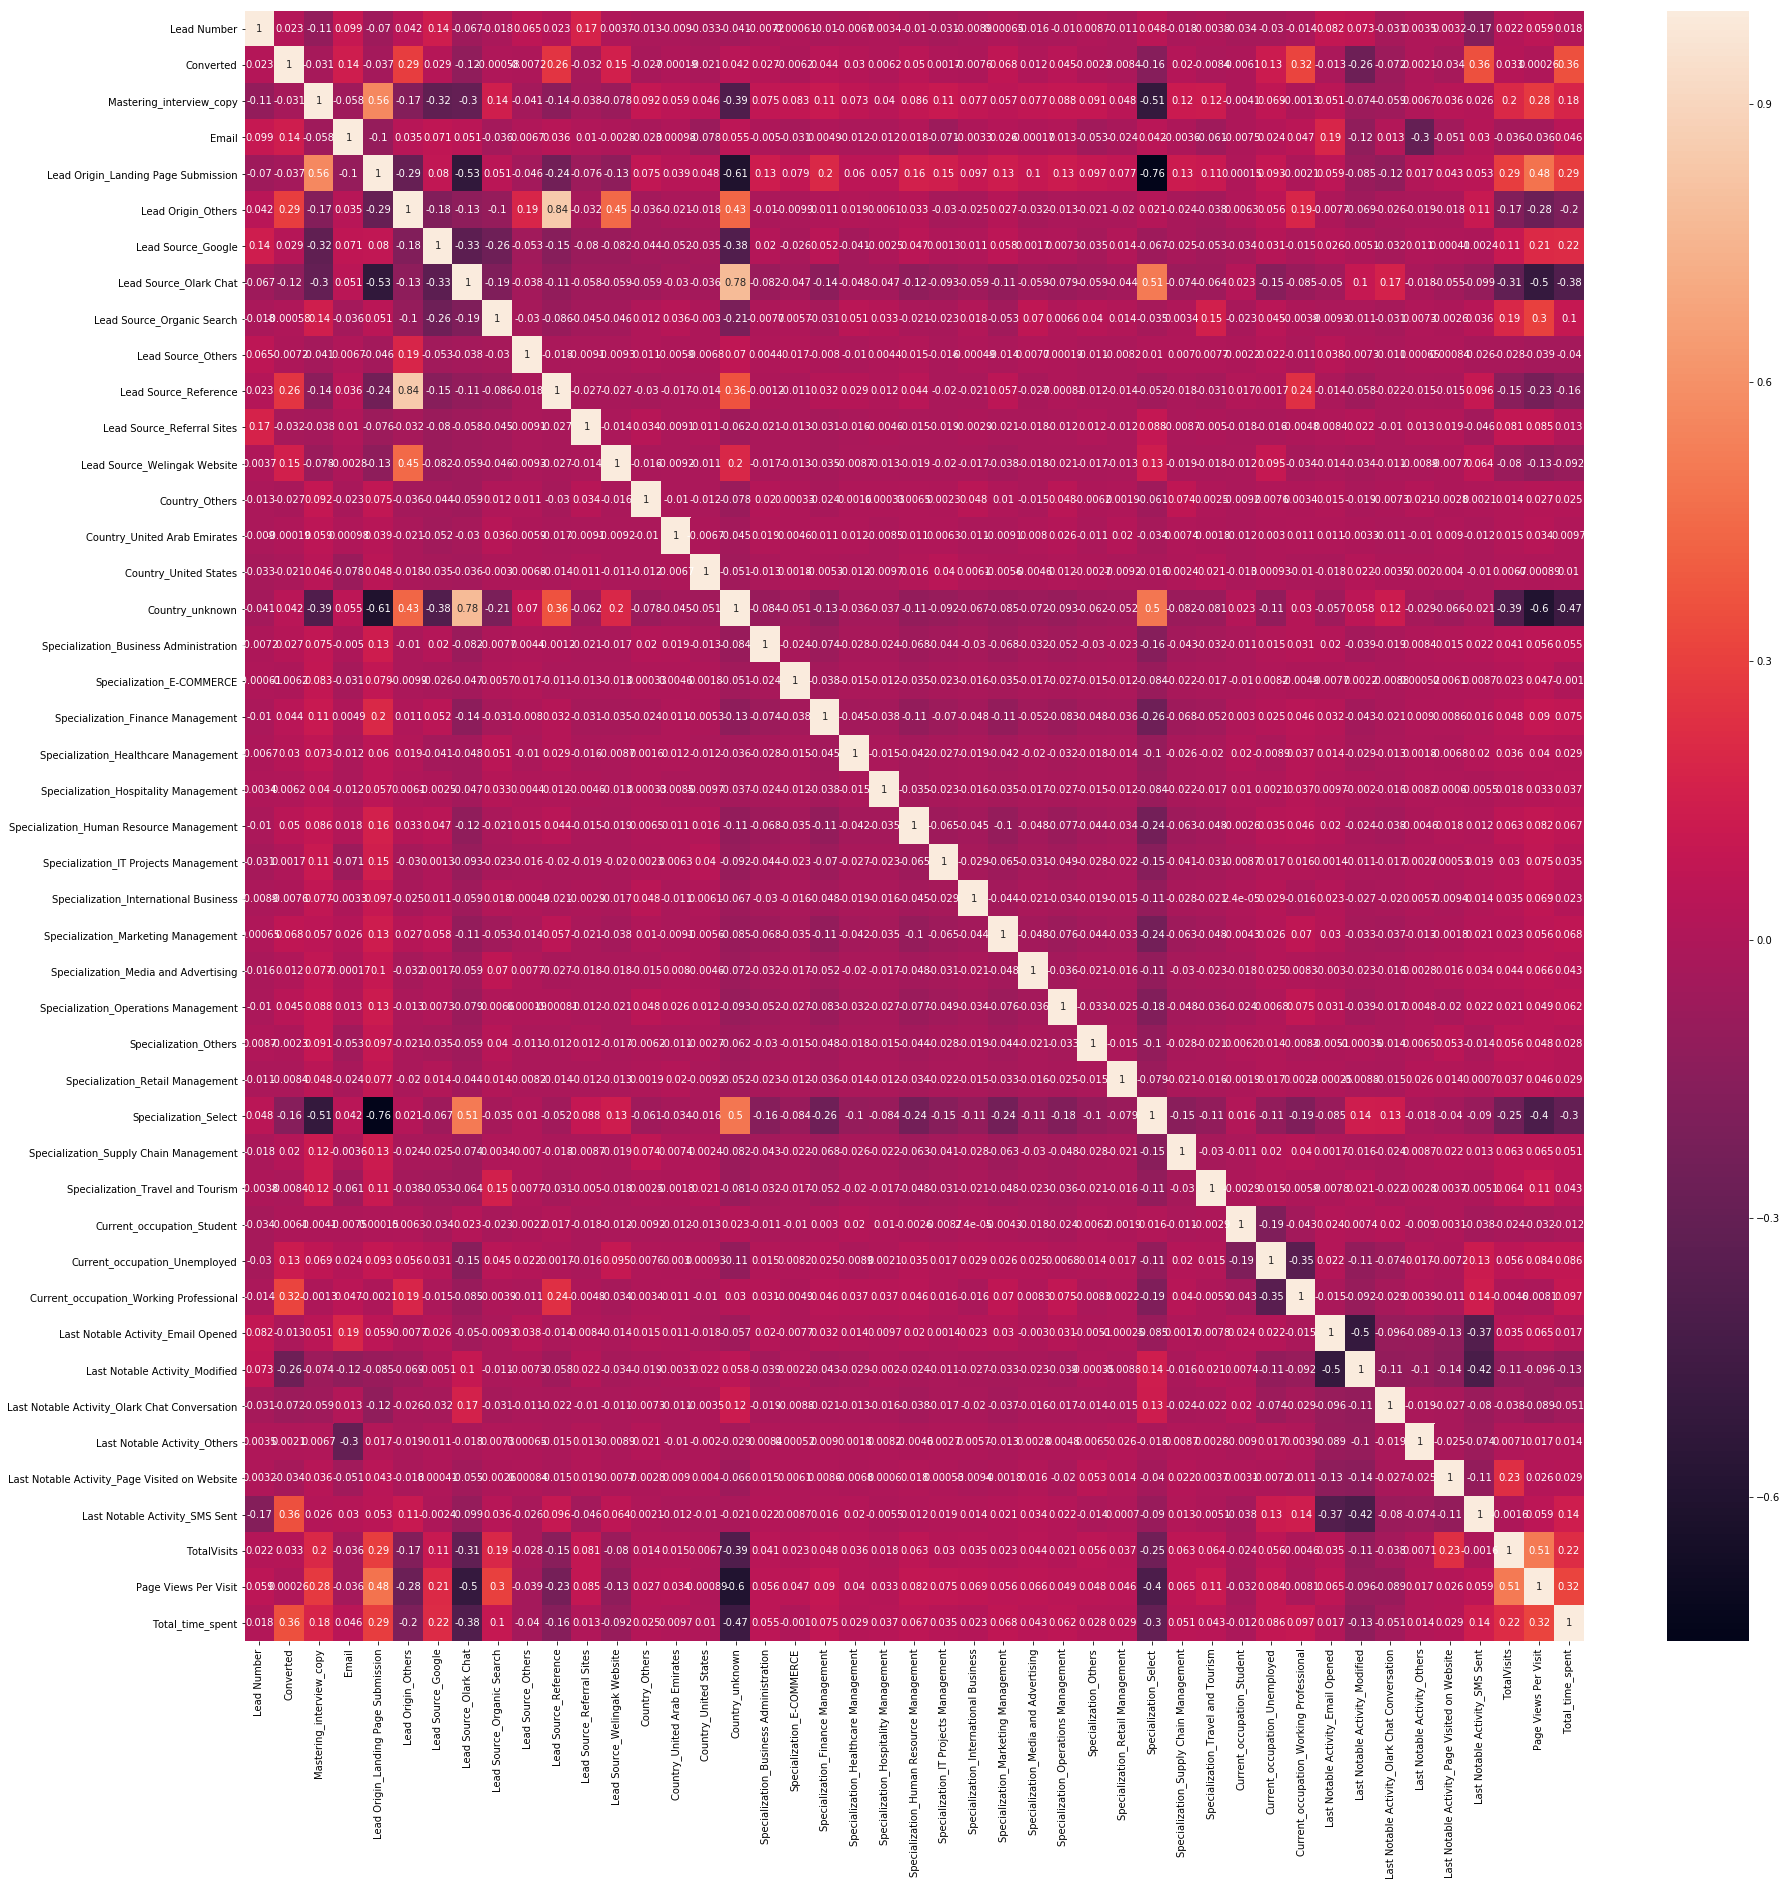

In [335]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(Leads.corr(),annot = True)

In [336]:
#Check correlation matrix
Leads.corr()

,Lead Number,Converted,Mastering_interview_copy,Email,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Current_occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,TotalVisits,Page Views Per Visit,Total_time_spent
Lead Number,1.000000,0.022830,-0.106875,0.098898,-0.069574,0.041689,0.140954,-0.067170,-0.018105,0.065285,...,-0.014346,0.082276,0.073397,-0.031037,0.003497,0.003162,-0.169679,0.022094,0.058703,0.018360
Converted,0.022830,1.000000,-0.030860,0.140786,-0.037481,0.291680,0.029022,-0.124085,-0.000581,-0.007214,...,0.316246,-0.013084,-0.263532,-0.071564,0.002064,-0.033830,0.360233,0.032855,0.000260,0.359261
Mastering_interview_copy,-0.106875,-0.030860,1.000000,-0.058023,0.564863,-0.167542,-0.322669,-0.300790,0.143951,-0.040563,...,-0.001324,0.051370,-0.073831,-0.059317,0.006716,0.035753,0.025631,0.201064,0.275664,0.177435
Email,0.098898,0.140786,-0.058023,1.000000,-0.099661,0.034601,0.070919,0.051070,-0.035510,0.006702,...,0.047325,0.189628,-0.122812,0.012911,-0.298559,-0.050922,0.029608,-0.035715,-0.036403,0.046192
Lead Origin_Landing Page Submission,-0.069574,-0.037481,0.564863,-0.099661,1.000000,-0.290159,0.079515,-0.528424,0.050919,-0.046191,...,-0.002073,0.059323,-0.084643,-0.118758,0.016800,0.043041,0.052736,0.290347,0.484119,0.292571
Lead Origin_Others,0.041689,0.291680,-0.167542,0.034601,-0.290159,1.000000,-0.181947,-0.129254,-0.102565,0.185045,...,0.186466,-0.007682,-0.068697,-0.026035,-0.018958,-0.017726,0.106590,-0.174476,-0.275049,-0.195788
Lead Source_Google,0.140954,0.029022,-0.322669,0.070919,0.079515,-0.181947,1.000000,-0.333076,-0.259823,-0.052666,...,-0.014743,0.025683,-0.005130,-0.031923,0.010821,0.000406,-0.002431,0.107321,0.205777,0.215448
Lead Source_Olark Chat,-0.067170,-0.124085,-0.300790,0.051070,-0.528424,-0.129254,-0.333076,1.000000,-0.186787,-0.037862,...,-0.084764,-0.050271,0.101099,0.166100,-0.018191,-0.055305,-0.098929,-0.312573,-0.503658,-0.378626
Lead Source_Organic Search,-0.018105,-0.000581,0.143951,-0.035510,0.050919,-0.102565,-0.259823,-0.186787,1.000000,-0.029535,...,-0.003901,-0.009302,-0.011360,-0.031233,0.007349,-0.002594,0.036019,0.193606,0.304414,0.100986
Lead Source_Others,0.065285,-0.007214,-0.040563,0.006702,-0.046191,0.185045,-0.052666,-0.037862,-0.029535,1.000000,...,-0.011064,0.037760,-0.007290,-0.011101,0.000654,0.000838,-0.026298,-0.027906,-0.038951,-0.039919


### Step 4: PCA 

Since the data is correlateda and we cannot remove the columns maually with such data, hence let's perform PCA

#### Splitting Data into Training and Test Sets

In [338]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = Leads.drop(['Prospect ID','Lead Number','Converted'],axis=1)

# Putting response variable to y
y = Leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [339]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [340]:
X_train.shape

(6351, 43)

In [342]:
from sklearn.decomposition import PCA

In [343]:
pca = PCA(random_state=42)

In [344]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

#### Components from the PCA

In [345]:
pca.components_

array([[ 1.27422834e-01, -4.98672387e-03,  2.11430535e-01, ...,
         5.46885388e-01,  5.61742490e-01,  4.30395941e-01],
       [-2.40213087e-02, -1.68637082e-02, -5.79073043e-02, ...,
         6.34669342e-01,  7.77389123e-02, -7.43442396e-01],
       [-1.65802665e-01,  2.94857794e-02, -2.70298735e-01, ...,
         5.28184678e-01, -5.54223469e-01,  4.64838879e-01],
       ...,
       [-1.48462732e-03, -2.41019181e-02,  1.76581358e-03, ...,
         8.67804494e-04, -8.80864036e-04,  1.47799005e-03],
       [ 4.00607449e-03, -9.02741515e-03, -4.11647839e-04, ...,
        -6.48569256e-04, -2.53084387e-03, -2.95380726e-04],
       [-3.49421451e-03, -1.13145572e-04,  2.26583159e-03, ...,
        -5.91023709e-05,  5.19385796e-04, -4.67659193e-04]])

In [346]:
#Variance Ratio
pca.explained_variance_ratio
pca.

array([3.26776098e-01, 1.39480748e-01, 9.11451903e-02, 6.14115140e-02,
       5.30918177e-02, 4.50573379e-02, 4.20625610e-02, 3.69589453e-02,
       2.31307755e-02, 1.94243950e-02, 1.60227987e-02, 1.47671647e-02,
       1.30894857e-02, 1.19568587e-02, 1.06334110e-02, 9.21351572e-03,
       7.70619859e-03, 7.35326112e-03, 7.18778028e-03, 6.33432559e-03,
       6.12065814e-03, 5.81142931e-03, 4.23183291e-03, 3.72261139e-03,
       3.50837944e-03, 3.37424317e-03, 3.26638709e-03, 3.19868058e-03,
       3.03092620e-03, 2.83854692e-03, 2.73057129e-03, 2.55579241e-03,
       2.15688784e-03, 1.92609855e-03, 1.89864165e-03, 1.80143872e-03,
       1.24779722e-03, 1.14004595e-03, 9.07843395e-04, 8.77176789e-04,
       4.44311785e-04, 3.29432715e-04, 7.60835556e-05])

Making a scree plot for the explained variance

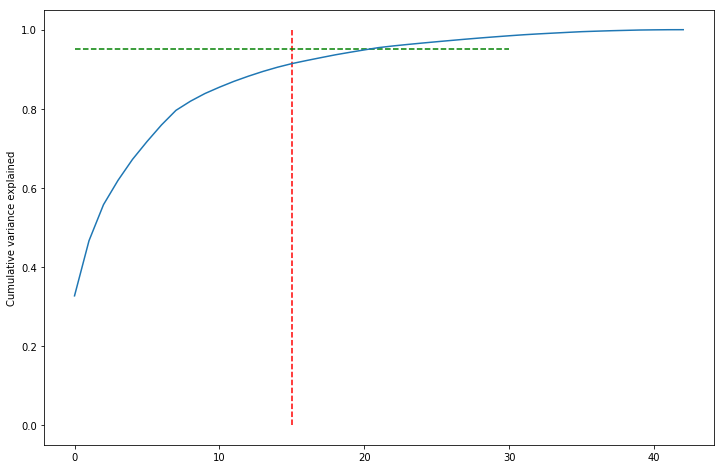

In [347]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 20 components

In [350]:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=20)
df_train_pca = pca_final.fit_transform(X_train)

In [351]:
#Check pca shape
df_train_pca.shape

(6351, 20)

In [353]:
#Correlation matrix
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(20, 20)

##### Plotting the heatmap of the corr matrix

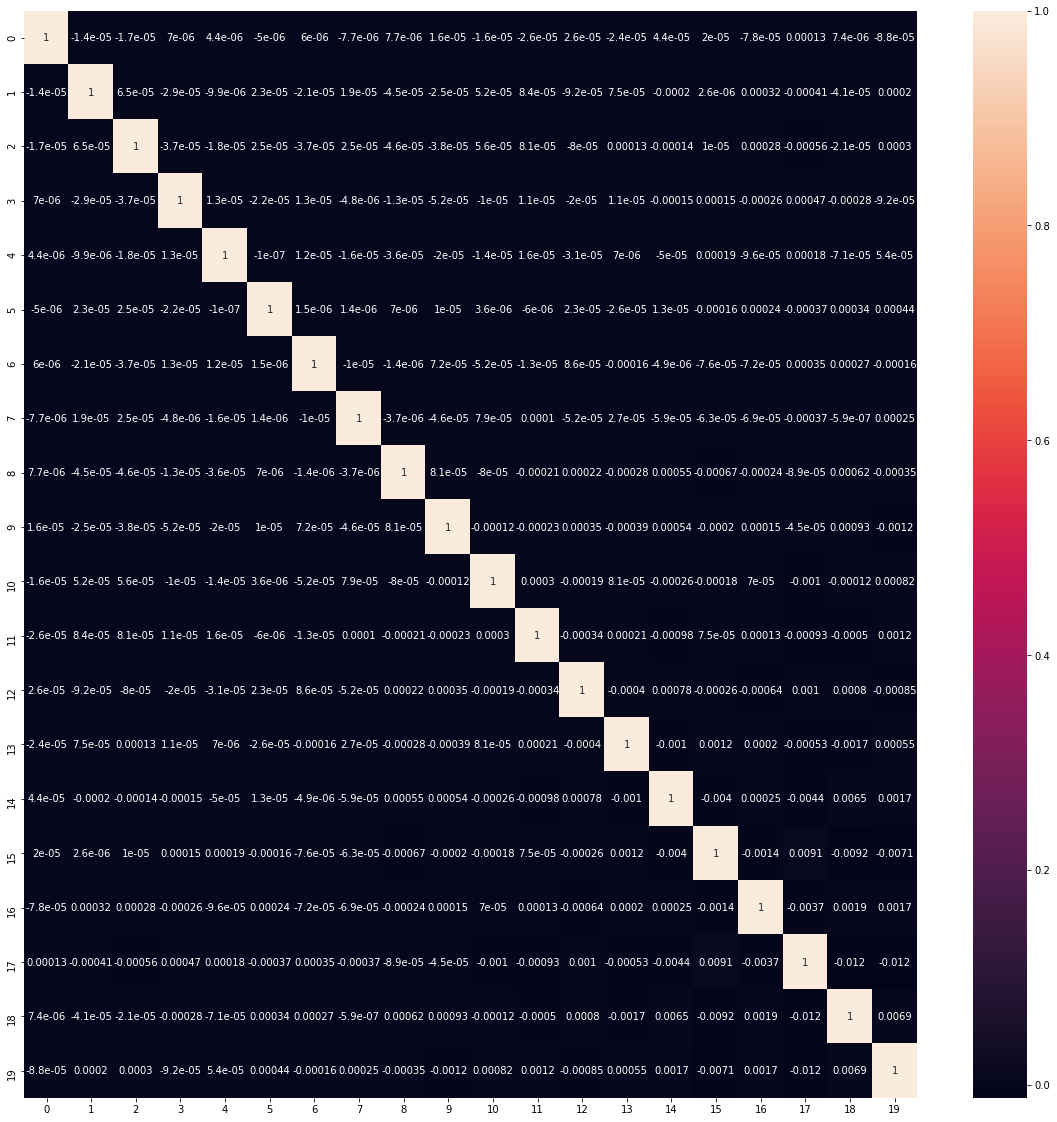

In [354]:
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)

The data is uncorrelated

##### Applying the transformation on the test set

In [355]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2723, 20)

#### Most Important Features

In [390]:
pd.DataFrame(pca_final.components_, columns=X_test.columns)

,Mastering_interview_copy,Email,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Current_occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,TotalVisits,Page Views Per Visit,Total_time_spent
0,0.127431,-0.004972,0.211431,-0.058655,0.082913,-0.168664,0.062599,-0.003054,-0.041281,0.005041,...,0.005526,0.020093,-0.054737,-0.009691,0.002102,0.016708,0.027322,0.546862,0.561751,0.430403
1,0.023972,0.016797,0.057902,-0.011406,0.071807,-0.068668,-0.028159,-0.001561,-0.007143,-0.008408,...,0.025711,-0.007419,-0.034181,-0.003662,0.000417,-0.029365,0.078525,-0.634560,-0.077863,0.743506
2,0.165755,-0.029628,0.270376,-0.026301,-0.007291,-0.125828,0.046645,0.000419,-0.016663,-0.002668,...,-0.016800,0.042549,0.037399,-0.015055,0.002106,-0.040184,-0.026134,-0.528229,0.554138,-0.464740
3,0.473403,-0.014755,0.358132,0.073104,-0.340665,-0.061455,-0.037124,0.004103,0.063125,-0.020819,...,0.036591,0.150971,-0.257956,-0.010236,0.001282,0.018672,0.092367,0.098589,-0.447541,-0.050145
4,0.212497,-0.119465,0.163751,-0.074021,-0.158410,0.012796,0.029663,-0.006507,-0.048162,0.001133,...,-0.008110,-0.548577,0.701773,-0.006328,0.001421,0.006334,-0.152865,0.040258,-0.126392,0.055693
5,0.006603,-0.035396,-0.122611,0.101227,-0.241121,0.023259,0.142575,0.000097,0.066445,0.002738,...,-0.033897,-0.507086,-0.132178,0.002174,0.005427,-0.000618,0.627145,-0.015734,0.149329,-0.022667
6,-0.220901,-0.000519,0.165438,0.034415,0.625060,-0.257852,-0.271107,-0.000129,0.024685,-0.020737,...,-0.074611,-0.175830,0.087837,-0.021801,0.003659,0.013289,0.100754,0.054139,-0.261076,-0.150190
7,0.111333,0.009012,-0.070190,-0.071282,-0.171410,0.057182,0.114450,0.003807,-0.089074,0.009992,...,-0.295972,0.217720,0.204097,-0.009563,0.000144,-0.013009,-0.396845,-0.013964,0.011993,0.063806
8,-0.211491,0.033652,-0.213695,0.526425,-0.148416,-0.316224,0.092332,0.027080,0.437400,0.010981,...,0.232478,0.066197,0.204856,-0.040405,-0.014343,-0.012037,-0.193311,0.010188,0.087055,0.051964
9,-0.159782,0.065624,0.167033,-0.053091,-0.009354,0.546924,-0.467649,-0.000525,-0.023097,-0.013110,...,-0.010132,-0.024531,0.059889,0.019019,-0.008728,-0.014426,-0.038779,0.016936,0.196017,0.080410


In [392]:
n_pcs = pca_final.n_components

most_imp=[np.abs(pca_final.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = X_test.columns
most_important_names= [initial_feature_names[most_imp[i]] for i in range(n_pcs)]
most_important_names

['Page Views Per Visit',
 'Total_time_spent',
 'Page Views Per Visit',
 'Mastering_interview_copy',
 'Last Notable Activity_Modified',
 'Last Notable Activity_SMS Sent',
 'Lead Source_Google',
 'Current_occupation_Unemployed',
 'Lead Origin_Others',
 'Lead Source_Olark Chat',
 'Specialization_Finance Management',
 'Specialization_Marketing Management',
 'Mastering_interview_copy',
 'Email',
 'Specialization_Marketing Management',
 'Current_occupation_Working Professional',
 'Last Notable Activity_Page Visited on Website',
 'Current_occupation_Working Professional',
 'Specialization_Supply Chain Management',
 'Lead Origin_Landing Page Submission']

### Step 5: Model Building

#### Applying logistic regression

In [359]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
#Fit train data
model_pca = learner_pca.fit(df_train_pca, y_train)

C:\Users\vi024ch\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Making predictions on the test set

In [362]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

# Converting pred_probs_test to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.074662
1,0.930203
2,0.066019
3,0.710431
4,0.057381


In [363]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [365]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Conversion_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Conversion_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

C:\Users\vi024ch\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


,Prospect ID,Converted,Conversion_Prob
0,0,0,0.074662
1,1,1,0.930203
2,2,0,0.066019
3,3,1,0.710431
4,4,0,0.057381


In [366]:
# Creating new column 'predicted' with 1 if Conversion_Prob>=0.8 else 0
y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map( lambda x: 1 if x >= 0.8 else 0)
# Let's see the head
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,predicted
0,0,0,0.074662,0
1,1,1,0.930203,1
2,2,0,0.066019,0
3,3,1,0.710431,0
4,4,0,0.057381,0


### Step 5: Model Evaluation

In [368]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Converted, y_pred_final.predicted )
confusion

array([[1678,   56],
       [ 603,  386]], dtype=int64)

In [369]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.7579875137715755

##### Redefining Conversion at 70%

In [371]:
# Creating new column 'predicted' with 1 if Conversion_Prob>=0.7 else 0
y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map( lambda x: 1 if x >= 0.7 else 0)
# Let's see the head
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,predicted
0,0,0,0.074662,0
1,1,1,0.930203,1
2,2,0,0.066019,0
3,3,1,0.710431,1
4,4,0,0.057381,0


#### Re-evaluate the model

In [373]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Converted, y_pred_final.predicted )
confusion

array([[1650,   84],
       [ 508,  481]], dtype=int64)

In [374]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.7825927286081528

##### Redefining Conversion at 75%

In [377]:
# Creating new column 'predicted' with 1 if Conversion_Prob>=0.75 else 0
y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map( lambda x: 1 if x >= 0.75 else 0)
# Let's see the head
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,predicted
0,0,0,0.074662,0
1,1,1,0.930203,1
2,2,0,0.066019,0
3,3,1,0.710431,0
4,4,0,0.057381,0


#### Re-evaluate the model

In [376]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Converted, y_pred_final.predicted )
confusion

array([[1650,   84],
       [ 508,  481]], dtype=int64)

In [378]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.7704737421961072

##### .70 probability should be the threshold(as it has the accuracy  of 78%)

In [383]:
# Creating new column 'predicted' with 1 if Conversion_Prob>=0.70 else 0
y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map( lambda x: 1 if x >= 0.70 else 0)
# Let's see the head
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,predicted
0,0,0,0.074662,0
1,1,1,0.930203,1
2,2,0,0.066019,0
3,3,1,0.710431,1
4,4,0,0.057381,0


#### ROC Curve

In [384]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

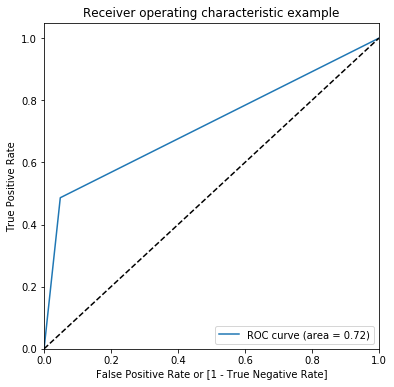

(array([0.        , 0.04844291, 1.        ]),
 array([0.        , 0.48634985, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [385]:
#Draw RC Curve
draw_roc(y_pred_final.Converted, y_pred_final.predicted)

In [386]:
#draw_roc(y_pred_final.Converted, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Conversion_Prob))

'0.88'

#### We see an overall AUC score of 0.88 looks like we did a decent job.